In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np

In [3]:
import pandas as pd
import re
import os

In [4]:
file_path ="D:\\big_data_R\\ptt-stock20240604.csv"
df = pd.read_csv(file_path)
df=df.iloc[:,1:8]
df.head()

,title,title_id,time,content,push_id,push_content,push_time
0,[新聞] 魏哲家霸氣喊「台積電無敵手」 擴廠連,keel90135 (尼可),Tue Jun 4 15:55:30 2024,原文標題：魏哲家霸氣喊「台積電無敵手」 擴廠連說3次台灣原文連結：https://finan...,xiaoyao,已知利多 我阿嬤都知道,06/04 15:57
1,[新聞] 魏哲家霸氣喊「台積電無敵手」 擴廠連,keel90135 (尼可),Tue Jun 4 15:55:30 2024,原文標題：魏哲家霸氣喊「台積電無敵手」 擴廠連說3次台灣原文連結：https://finan...,strlen,尼這樣 美國老大哥又不高興惹,06/04 15:58
2,[新聞] 魏哲家霸氣喊「台積電無敵手」 擴廠連,keel90135 (尼可),Tue Jun 4 15:55:30 2024,原文標題：魏哲家霸氣喊「台積電無敵手」 擴廠連說3次台灣原文連結：https://finan...,chinaeatshit,不說台灣明天就跌停了 說台灣又是預料中 簡單的說,06/04 15:58
3,[新聞] 魏哲家霸氣喊「台積電無敵手」 擴廠連,keel90135 (尼可),Tue Jun 4 15:55:30 2024,原文標題：魏哲家霸氣喊「台積電無敵手」 擴廠連說3次台灣原文連結：https://finan...,chinaeatshit,就是沒有利多,06/04 15:58
4,[新聞] 魏哲家霸氣喊「台積電無敵手」 擴廠連,keel90135 (尼可),Tue Jun 4 15:55:30 2024,原文標題：魏哲家霸氣喊「台積電無敵手」 擴廠連說3次台灣原文連結：https://finan...,ccdrv,已反應 全世界都知道,06/04 15:58


In [5]:
def remove_number(text):
    return re.sub(r'[0-9.]', '', text)
df['push_content']=df['push_content'].apply(remove_number)

In [6]:
webs=[]
for i in df['push_content']:
    website=re.findall(r"http[s]?://[^\s]+",i)
    if len(website)>0:
        webs.append(website)
        
for j in webs:
    df['push_content']=df['push_content'].replace(j,"")

In [7]:
df=df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
print(df.isnull().sum())

title           0
title_id        0
time            0
content         0
push_id         0
push_content    0
push_time       0
dtype: int64


In [8]:
positive_words = ['賺爛','利多','月增','年增','穩穩','穩','厲害','推','降息','轉虧為盈','減少成本','成本減少','跳空','多賺','發大財','有前景',
                  '盈利','利好','強勁','繁榮','讚','無敵','霸氣','噴','加碼','猛','順差','買超','牛市','潛力股','創新高','GG','台積','贏','發了',
                  '強勢','熱點','大漲','增量','看漲','超額收益','穩賺','高成長','推','降息','漲','ai','amd','nvidia','AI',"AMD",'NVIDIA']

middle_words = ['投資','收益','獲利','份額','營收','市場','業績','需求','進步','效率','生產','財務','股息','銷售','業績','預期',
                '回報','風險','收益率','成長','回報','利潤','市值','經濟','消息','預期','利']

positive_degree=['增加','提升','更多','上升','飆升','提高','改善','強勁','增長','擴展','看好','好','超額','無限']

negative_degree=['減少','下降','放緩','面臨','低迷','不明','停滯','不佳','衰退','下滑','跌','壞','低','不如','沒有']

negative_words = ['韭菜','缺電','升息','出貨','跌停','gg','月減','年減','破產','高失業','高通貨膨脹','雷','崩潰','崩盤','利多出盡','空頭',
                  '跌破','中國','跌到','拉回','停損','賺不到','不會賺','跌爛','大跌','散戶','崩','暴跌','跌幅','套','殺','悲','穩死',
                  '跳水','賣超','倒','哭','完蛋','回檔','衰','賠','虧損','下挫','貶值','裁員','魯蛇','破產','重組','減產','爛死', 
                  '經濟衰退','債務','虧本','虧空','失敗','損失','赤字','退市','笑死','違約','緊縮','利空','qq','慘','折損','沒賺到','賣',
                  '萎縮','撤資','震盪','惡化','失敗','困難','賣壓','下去','xd','制裁','沒有利多','怕','QQ','別買','XD','臭','隱憂','小心']

In [9]:
def classify_sentence(sentence):
    # 尋找負面形容詞和中立詞語同時出現
    if any(neg_word in sentence for neg_word in negative_degree):
        if any(mid_word in sentence for mid_word in middle_words):
            return 'negative'
    
    # 尋找負面詞語
    if any(word in sentence for word in negative_words):
        return 'negative'
    
    # 尋找正面詞語
    if any(word in sentence for word in positive_words):
        return 'positive'
    
    # 尋找正面形容詞和中立詞語同時出現
    if any(pos_word in sentence for pos_word in positive_degree):
        if any(mid_word in sentence for mid_word in middle_words):
            return 'positive'
    
    
    return None  # If no match

In [10]:
# 應用情感標籤函數並生成sentiment列
df['sentiment'] = df['push_content'].apply(classify_sentence)
# 只保留正向和負向的標籤
df = df[df['sentiment'].notnull()]
print('回文數目（全部）：%d' % df.shape[0])
print('回文數目（正面）：%d' % df[df.sentiment=='positive'].shape[0])
print('回文數目（負面）：%d' % df[df.sentiment=='negative'].shape[0])

回文數目（全部）：4124
回文數目（正面）：1955
回文數目（負面）：2169


In [11]:
stop_words=[]
with open("C:\\Users\\user\\Downloads\\cn_stopwords_1.txt", 'r', encoding='utf8') as f:
    stop_words = f.read().split('\n') 
stop_words.append('\n')
def remove_stopwords(text):
    words = jieba.lcut(text)
    return ' '.join([word for word in words if word not in stop_words])
df['content_cut']=df['push_content'].apply(remove_stopwords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.299 seconds.
Prefix dict has been built successfully.


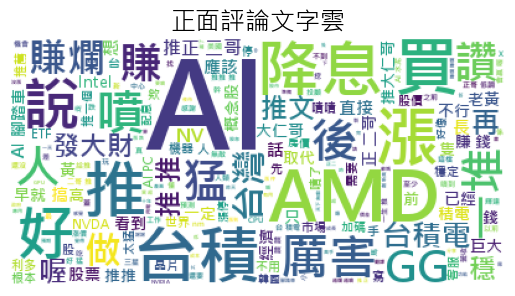

In [63]:
df_pos=df[df.sentiment=='positive']
font="C:\\Windows\\Fonts\\msjhbd.ttc"
text = " ".join(review for review in df_pos.content_cut)
my_wordcloud = WordCloud(background_color='white',font_path=font).generate(text)
plt.imshow(my_wordcloud)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams.update({'font.size': 15})
plt.title("正面評論文字雲")
plt.axis("off")
plt.show()

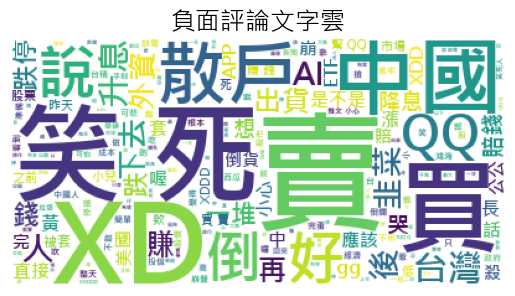

In [62]:
df_neg=df[df.sentiment=='negative']
font="C:\\Windows\\Fonts\\msjhbd.ttc"
text = " ".join(review for review in df_neg.content_cut)
my_wordcloud = WordCloud(background_color='white',font_path=font).generate(text)
plt.imshow(my_wordcloud)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams.update({'font.size': 15})
plt.title("負面評論文字雲")
plt.axis("off")
plt.show()

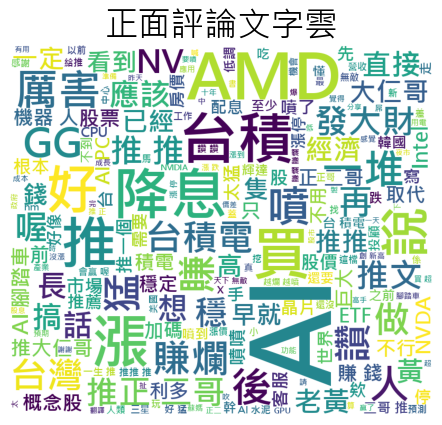

In [58]:
df_pos=df[df.sentiment=='positive']
font="C:\\Windows\\Fonts\\msjhbd.ttc"
text = " ".join(review for review in df_pos.content_cut)
my_wordcloud = WordCloud(width=800, height=700,background_color='white',font_path=font).generate(text)
plt.imshow(my_wordcloud)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams.update({'font.size': 20})
plt.title("正面評論文字雲")
plt.axis("off")
plt.show()

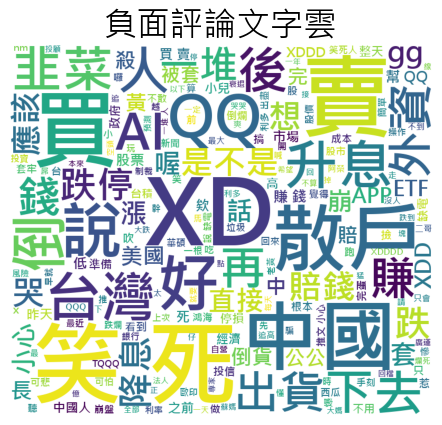

In [64]:
df_neg=df[df.sentiment=='negative']
font="C:\\Windows\\Fonts\\msjhbd.ttc"
text = " ".join(review for review in df_neg.content_cut)
my_wordcloud = WordCloud(width=800, height=700,background_color='white',font_path=font).generate(text)
plt.imshow(my_wordcloud)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams.update({'font.size': 20})
plt.title("負面評論文字雲")
plt.axis("off")
plt.show()